# Binary search trees

A **binary search tree (BST)** is a type of binary tree in which each node contains a value and has at most two child nodes: a left child and a right child. Each node can be represented as a triplet $(l, v, r)$, where:

* $v$ is the value stored in the current node,
* $l$ is the left child,
* $r$ is the right child.

The tree satisfies the **binary search property**:
For every node, all values in its left subtree are strictly less than $v$, and all values in its right subtree are strictly greater than $v$:

$$
\forall x \in \text{left subtree of } v, \; x < v \quad \text{and} \quad \forall y \in \text{right subtree of } v, \; v < y
$$

This property must hold recursively for all nodes in the tree.

If elements are inserted into the tree in the random order, the average depth of nodes is $log(N)$ where $N$ is the number of nodes of the tree.

In [2]:
import random
from binary_search_trees_files.tree_svg import BST, visualize_tree
from typing import Any

## Implementation

There are many ways to implement a tree using the python programming language. For example, we'll use an approach that only allows access to the tree through the root node, with all child elements nested.

In my opinion, this approach really represents the spirit of tree approach.

In [3]:
class Node:
    def __init__(
        self,
        val: Any = 0,
        left: "Node | None" = None,
        right: "Node | None" = None,
        parent: "Node | None" = None
    ):
        self.val = val
        self.left = left
        self.right = right
        self.parent = parent
        self.parent_link()

    def __str__(self) -> str:
        return str(self.val)

    def parent_link(self):
        if self.right is not None:
            self.right.parent = self
            self.right.parent_link()
        if self.left is not None:
            self.left.parent = self
            self.left.parent_link()

**Note:** The represented implementation keeps a pointer to the parent node, if it exists, and contains tools that support the parent. This is not necessary, and in many implementations, the node doesn't keep information about the parent node. However, it makes it much easier to implement some operations under BST.

Particular realisatoin of the tree example in the cell below:

In [3]:
#    [1]
#  [2] [3]
head = Node(
    1,
    Node(2),
    Node(3)
)

### Visualisation

There is a special tool for tree visualization: `binary_search_tree_files.tree_svg.visualize_tree`. However, it only accepts trees in a special format. The following cell implements a function that transforms the format chosen for this page into the format that is used for visualization.

In [105]:
def convert_BSE(tree: Node | None) -> BST:
    if tree is None:
        return None
    return (
        tree.val,
        convert_BSE(tree=tree.left) if tree.left else None,
        convert_BSE(tree=tree.right) if tree.right else None
    )

The following cell shows how the arbitrary tree can be visualized.

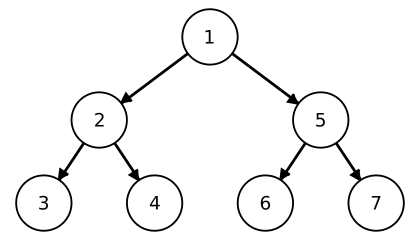

In [5]:
head = Node(
    1,
    Node(
        2,
        Node(val=3),
        Node(val=4)
    ),
    Node(
        5,
        Node(val=6),
        Node(val=7)
    )
)
visualize_tree(convert_BSE(tree=head))

## Search

Searching for the element is a fundamental operation for the data structure under consideration. The way it could be done follows from the definition of the binary search tree.

To search for an element in a binary search tree (BST), start at an arbitrary node (typically the root). At each step:

* If the value stored in the current node is equal to the target value, the search is successful.
* If the target value is less than the current node's value, continue the search in the left subtree.
* Otherwise, continue the search in the right subtree.

The process repeats until either the target value is found or there is no child node to continue the search, in which case the value is not present in the tree.

---

The following cell implements the search for example of the BST.

**Note**. If the appropriate element is not found, it returns the last leaf of the search. This would be usefull for adding and removing operations.

In [10]:
def search(tree: Node, val: Any) -> Node:
    if (val < tree.val) and tree.left is not None:
        return search(tree=tree.left, val=val)
    elif (val > tree.val) and tree.right is not None:
        return search(tree=tree.right, val=val)
    return tree

Consider how the search function works for the tree defined in the following cell.

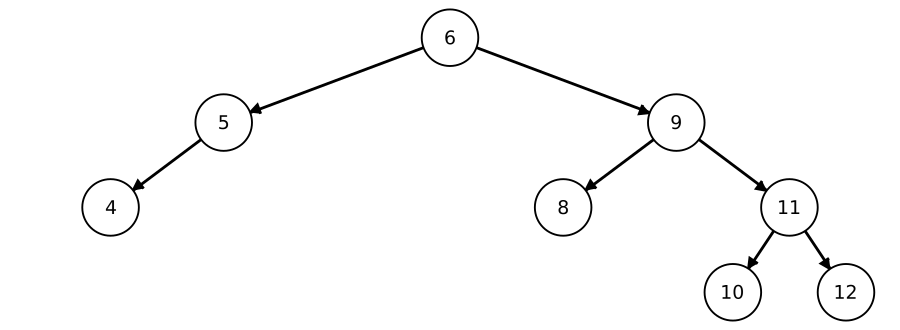

In [12]:
example = Node(
    val=6,
    left=Node(
        val=5,
        left=Node(val=4)
    ),
    right=Node(
        val=9,
        left=Node(val=8),
        right=Node(
            val=11,
            left=Node(val=10),
            right=Node(val=12)
        )
    )
)
visualize_tree(convert_BSE(example))

The following cell prints the tree gotten in case you're looking for the element 5 in the example tree.

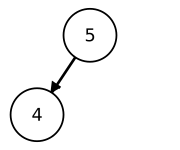

In [13]:
visualize_tree(convert_BSE(search(tree=example, val=5)))

The next code tries to find the node with the value of 7 in the example, which does not exist.

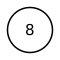

In [14]:
visualize_tree(convert_BSE(search(tree=example, val=7)))

The result is a leaf with the closes value.

## Add

To add an element to the tree, you simply have to find the node without ancestors on the side where new node is supposed to be added and create the node in the corresponding place.

---

The following cell implements the `add` function, which adds a value to the tree. It simply adds a new value to the output of the `search`, but only when the search returns a node with a different value. Otherwise, the element we want to add has already been added to the tree.

In [8]:
def add(tree: Node | None, val: Any):

    if tree is None:
        return Node(val=val)

    node = search(tree=tree, val=val)
    if (val < node.val):
        node.left = Node(val=val, parent=node)
    elif (val > node.val):
        node.right = Node(val=val, parent=node)

    return tree

For example, consider the generation of a BST with random elements.

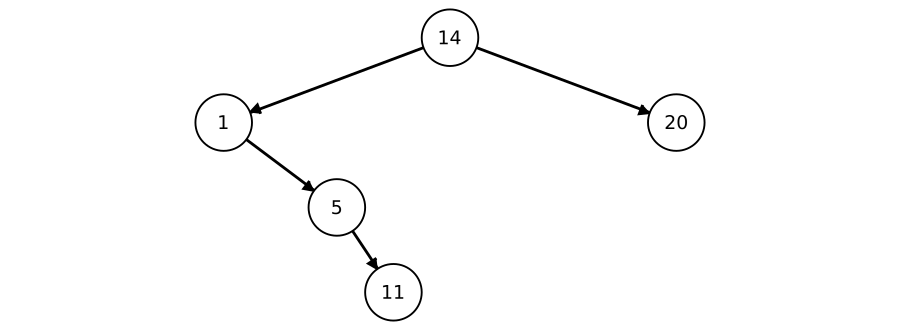

In [26]:
tree = None
for i in range(1, 7):
    tree = add(tree, val=random.randint(0, 20))
visualize_tree(convert_BSE(tree))

## Delete

In general, to delete the item you have to unlink it from its parent. The process becomes more complicated when you need to delete an element that has its own children.

There are a few approaches to deleting a node with children from a BST, but we'll use the following: replace the node to be deleted with the smallest value from its right subtree. This ensures that the new element is greater than all elements in the left subtree and smaller than any other element in the right subtree.

More specifically. You have to:

- Identify the item to be deleted by regular search through items.
- Identify the item that that will replace one being removed:
    - In the most general case, it is the smallest element in the right subtree of the element to be deleted.
    - If there is no right subtree, then the left element would be the one to be deleted.
    - If the leaf element is supposed to be removed (so it doesn't have right and left subtree), then we don't need an element to replace it.
- Recursively delete the element that is supposed to replace the element being deleted from the tree.
- Reset the boundaries of the parent and child elements of the element to be deleted to the element that will replace it.

---

The following cell implemenets the `delete` function that realises remove of the element from the binary tree.

In [145]:
def delete(tree: Node | None, val: Any) -> Node | None:
    if tree is None:
        return None

    remove = search(tree=tree, val=val)
    if remove.val != val:
        return tree

    # Determine new element
    if remove.right is not None:
        new = remove.right
        while new.left is not None:
            new = new.left
    elif remove.left is not None:
        new = remove.left
    else:
        new = None

    if new is not None:
        delete(tree=new, val=new.val)
        new.left = remove.left
        new.right = remove.right
        new.parent = remove.parent
    
    # Replace remove with new for parent
    if remove.parent is not None:
        if remove.parent.left is remove:
            remove.parent.left = new
        elif remove.parent.right is remove:
            remove.parent.right = new
    else:
        tree = new

    if remove.left is not None:
        remove.left.parent = new
    if remove.right is not None:
        remove.right.parent = new

    return tree

**Note** due to the implementation details, you should replace the original tree with the result of the `delete` function. Formally, it just rebuilds the relations between elements. If the root element is deleted, use "new" as the new entry point to the tree.

Consider a following cell, which defines realatively complex tree.

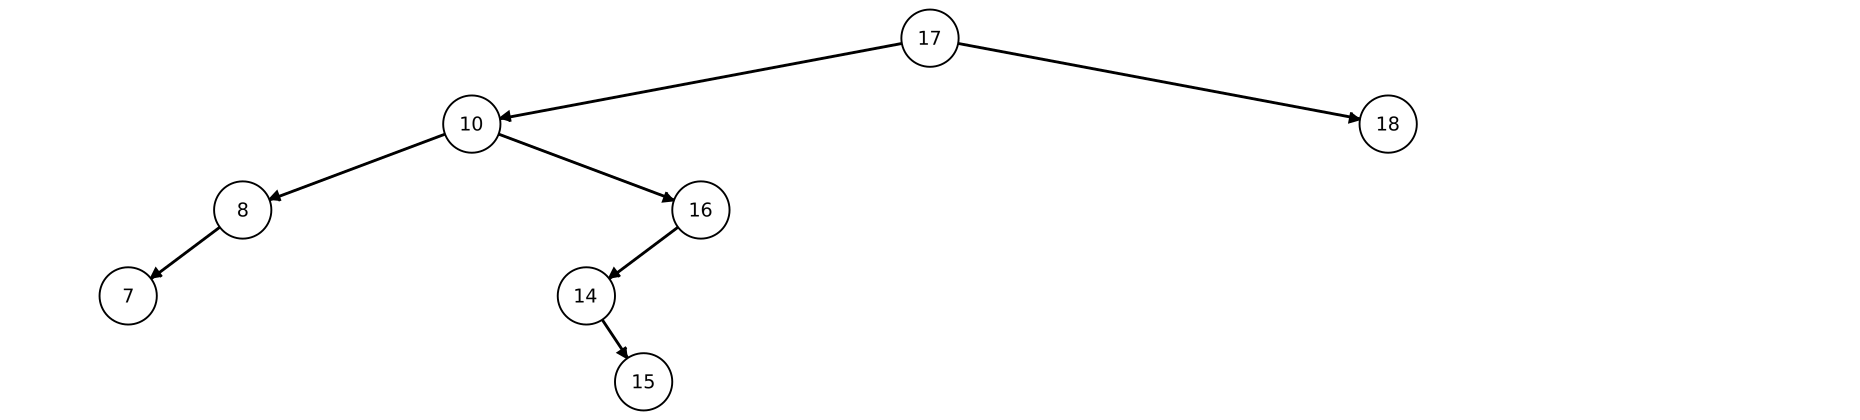

In [143]:
tree = add(tree=None, val=17)
for v in [10, 16, 14, 15, 8, 7, 18]:
    tree = add(tree, v)
visualize_tree(convert_BSE(tree))

The result of applying of the function to delete the "10" element is shown in the following tree.

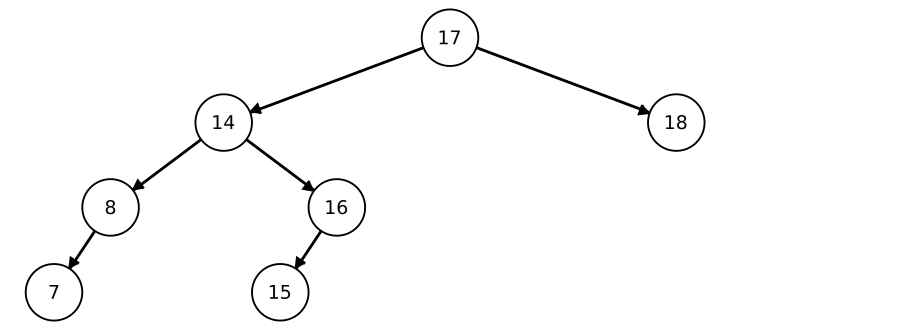

In [144]:
visualize_tree(convert_BSE(delete(tree=tree, val=10)))